# 연금복권 번호 추측하기

> - 연금복권의 추첨번호는 모두 `독립변수`임
> 1. 조 번호부터 1 ~ 6번 번호까지 가장 많이 나온 수가 `오직 1개인 때의 가장 많이 나온 번호`를 선택하기
> 2. 이전 당첨 번호를 역대 당첨번호에서 찾고, `해당 번호 다음으로 나온 수 중 가장 많이 나온 수`를 선택하기

> ## - 추출된 번호에 대한 어떠한 `상관관계` 나 `인과관계`가 전혀 없다
> ## - 단지 가장 많이 나온 번호가 무엇인지는 밝힐 수 있다.

In [27]:
import pandas as pd
import numpy as np

df = pd.read_csv('./pension720.csv', index_col=0)#index_col=0)#.sort_index(ascending=True)
# df.drop(columns='Unnamed: 0', axis=0, inplace=True, )
df.tail()

,ID,DATE,JO,NUM_1,NUM_2,NUM_3,NUM_4,NUM_5,NUM_6
104,104,20220505,1,1,8,0,5,0,6
105,105,20220512,5,3,0,7,6,9,5
106,106,20220519,3,1,9,2,7,5,0
107,107,20220526,3,6,0,5,1,9,5
108,108,20220602,3,1,6,4,1,1,5


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109 entries, 0 to 108
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   ID      109 non-null    int64
 1   DATE    109 non-null    int64
 2   JO      109 non-null    int64
 3   NUM_1   109 non-null    int64
 4   NUM_2   109 non-null    int64
 5   NUM_3   109 non-null    int64
 6   NUM_4   109 non-null    int64
 7   NUM_5   109 non-null    int64
 8   NUM_6   109 non-null    int64
dtypes: int64(9)
memory usage: 8.5 KB


In [82]:
# 데이터 추가

df = df.append({
    'ID':df['ID'][-1:].item()+1,
    'DATE':20220602,
    'JO':3,
    'NUM_1':1,
    'NUM_2':6,
    'NUM_3':4,
    'NUM_4':1,
    'NUM_5':1,
    'NUM_6':5,
    }, ignore_index=True)

# new_df = pd.DataFrame([[df['ID'][-1:].item()+1,20220602,3,1,1,1,1,1,1]], columns=['ID','DATE','JO','NUM_1','NUM_2','NUM_3','NUM_4','NUM_5','NUM_6'], )

# df = pd.concat([df, new_df], axis=0)
df.tail()

<ipython-input-82-dae418ea2d32>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


,ID,DATE,JO,NUM_1,NUM_2,NUM_3,NUM_4,NUM_5,NUM_6
104,104,20220505,1,1,8,0,5,0,6
105,105,20220512,5,3,0,7,6,9,5
106,106,20220519,3,1,9,2,7,5,0
107,107,20220526,3,6,0,5,1,9,5
108,108,20220602,3,1,6,4,1,1,5


In [9]:
# 데이터 삭제
df = df.drop(labels=df['ID'][-1:].item(), axis=0, inplace=False)
            # labels : Index or column labels to drop. A tuple will be used as a single label and not treated as a list-like.
                        # axis : {0 or 'index', 1 or 'columns'}, default 0
                                # inplace : If False, return a copy. Otherwise, do operation inplace and return None.
df.tail()

,ID,DATE,JO,NUM_1,NUM_2,NUM_3,NUM_4,NUM_5,NUM_6
103,103,20220428,2,6,8,9,9,2,2
104,104,20220505,1,1,8,0,5,0,6
105,105,20220512,5,3,0,7,6,9,5
106,106,20220519,3,1,9,2,7,5,0
107,107,20220526,3,6,0,5,1,9,5


In [19]:
## Unnamed: 0 제거
# df.drop(labels='Unnamed: 0',axis=1, inplace=True)
# df.tail()

In [83]:
# to_csv
df.to_csv('./pension720.csv')

In [29]:
## analysis DF
df = df.sort_index(ascending=False)
df

,ID,DATE,JO,NUM_1,NUM_2,NUM_3,NUM_4,NUM_5,NUM_6
108,108,20220602,3,1,6,4,1,1,5
107,107,20220526,3,6,0,5,1,9,5
106,106,20220519,3,1,9,2,7,5,0
105,105,20220512,5,3,0,7,6,9,5
104,104,20220505,1,1,8,0,5,0,6
...,...,...,...,...,...,...,...,...,...
4,4,20200604,4,7,5,4,6,5,5
3,3,20200528,4,1,2,4,4,2,0
2,2,20200521,4,5,4,4,9,5,5
1,1,20200514,2,4,5,0,5,5,8


----------------

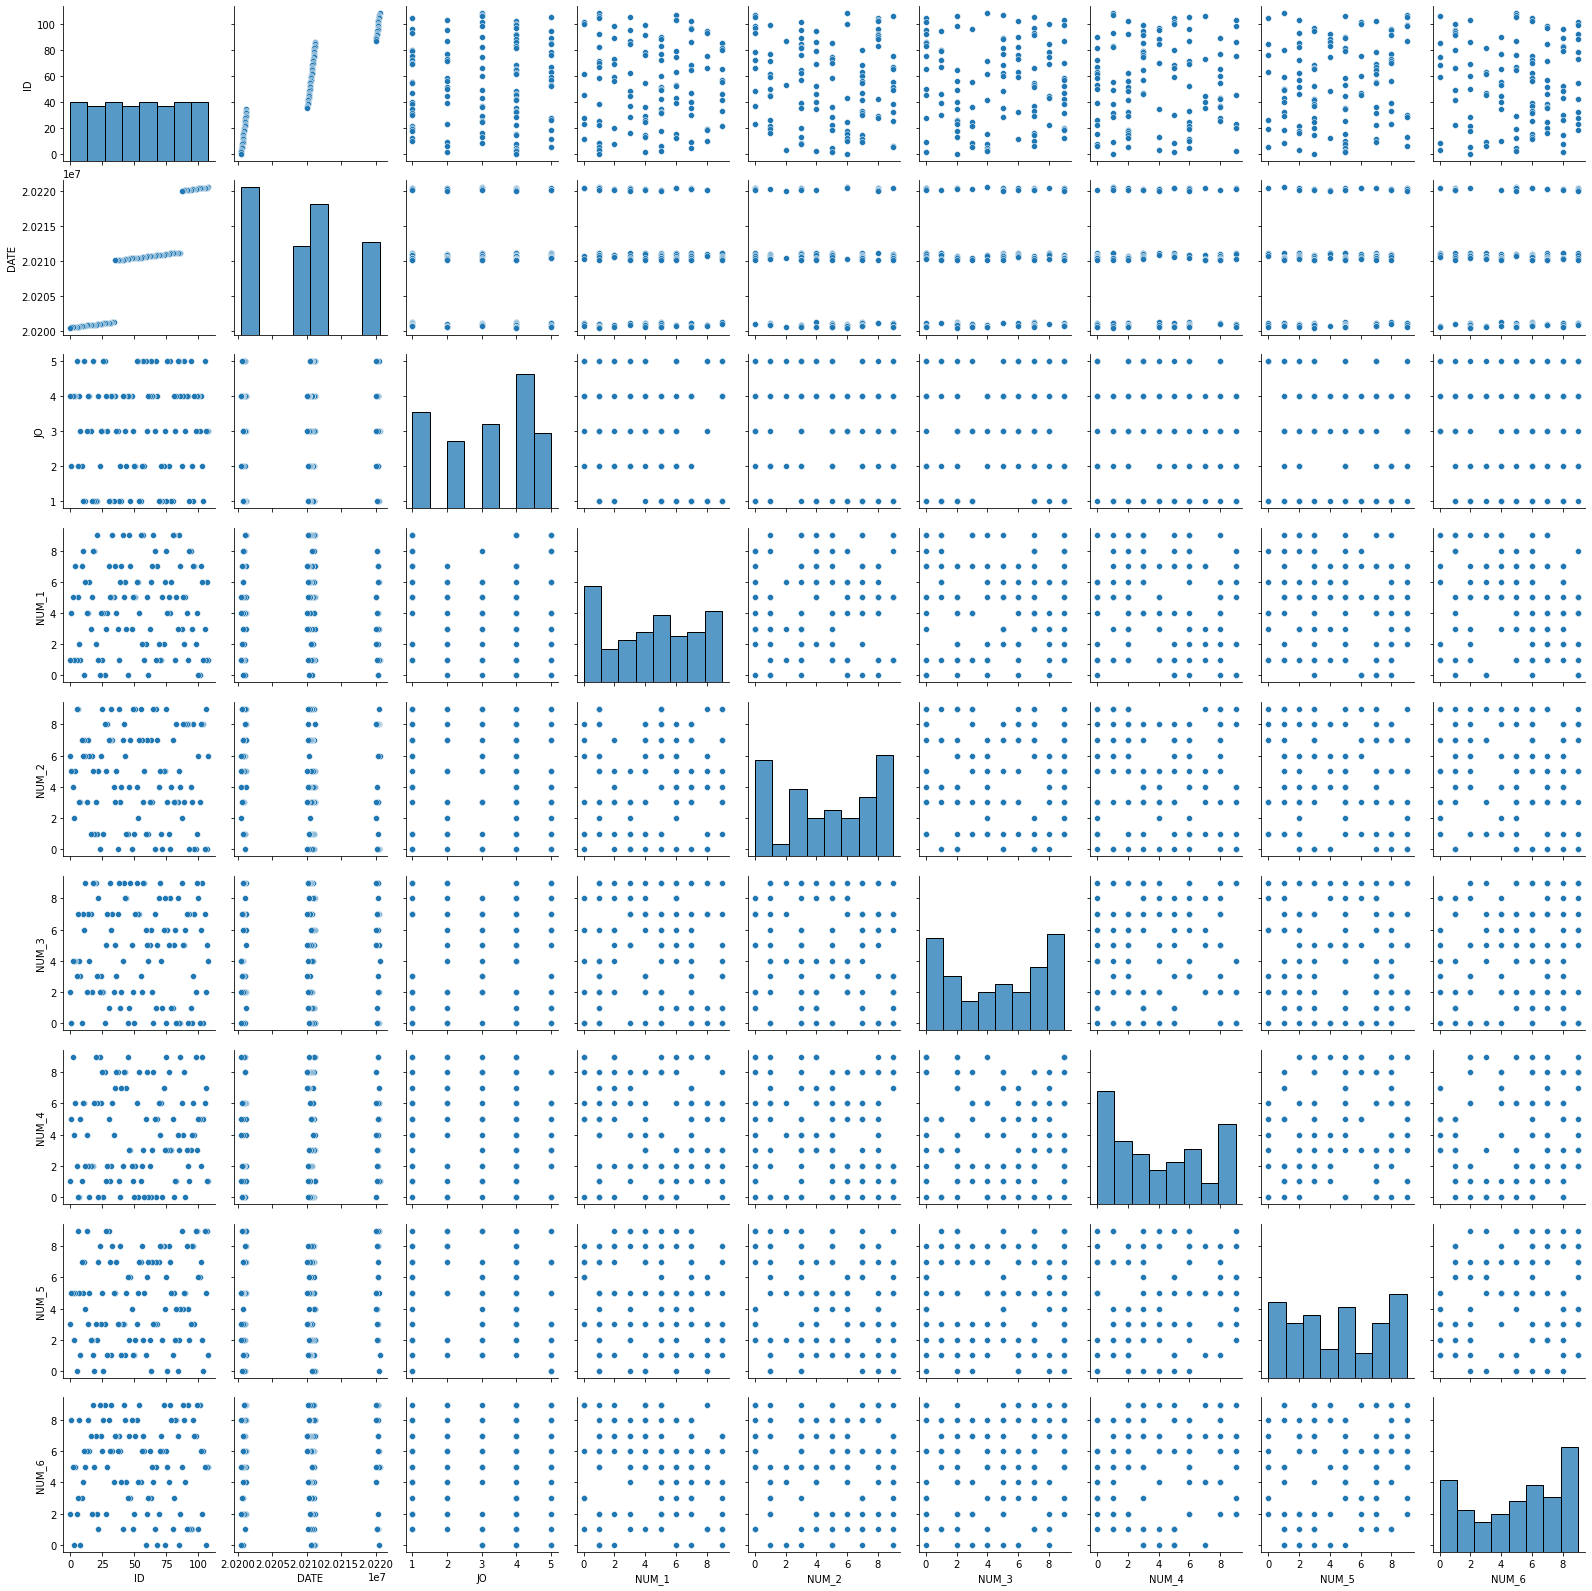

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(df)

> ## 모든 데이터가 `독립변수`다..

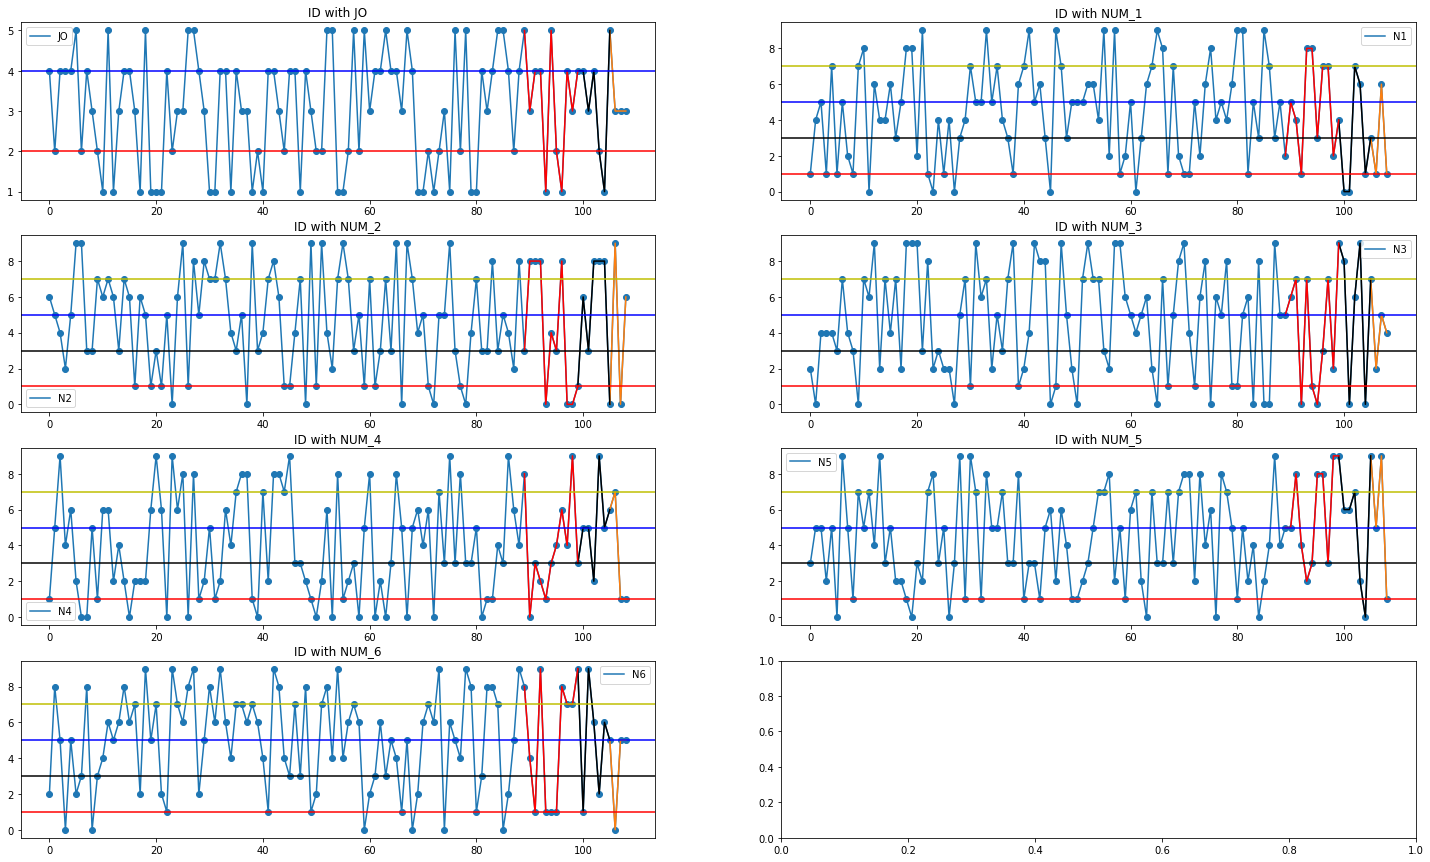

In [32]:
ID = df['ID']
JO = df['JO'] # [-30:]

plt.subplots(4,2, figsize=(25,15))

# JO
plt.subplot(421)
plt.title('ID with JO')
plt.scatter(ID,df['JO'])

plt.plot(ID,df['JO'], label='JO')
plt.plot(ID[:4], df['JO'][:4])
plt.plot(ID[3:10], df['JO'][3:10], color = 'k')
plt.plot(ID[9:20], df['JO'][9:20], color='r')
# plt.plot(ID[19:40], df['JO'][19:40], color='b')


plt.axhline(2, color='r', )
plt.axhline(4, color='b', )
plt.legend()

# NUM_1
plt.subplot(422)
plt.title('ID with NUM_1')
plt.scatter(ID,df['NUM_1'])

plt.plot(ID,df['NUM_1'], label='N1')
plt.plot(ID[:4], df['NUM_1'][:4])
plt.plot(ID[3:10], df['NUM_1'][3:10], color='k')
plt.plot(ID[9:20], df['NUM_1'][9:20], color='r')
# plt.plot(ID[19:40], df['NUM_1'][19:40], color='b')

plt.axhline(1, color='r')
plt.axhline(3, color='k')
plt.axhline(5, color='b')
plt.axhline(7, color='y')
plt.legend()

# NUM_2
plt.subplot(423)
plt.title('ID with NUM_2')
plt.scatter(ID,df['NUM_2'])

plt.plot(ID,df['NUM_2'], label='N2')
plt.plot(ID[:4], df['NUM_2'][:4])
plt.plot(ID[3:10], df['NUM_2'][3:10], color='k')
plt.plot(ID[9:20], df['NUM_2'][9:20], color='r')
# plt.plot(ID[19:40], df['NUM_2'][19:40], color='b')

plt.axhline(1, color='r')
plt.axhline(3, color='k')
plt.axhline(5, color='b')
plt.axhline(7, color='y')
plt.legend()

# NUM_3
plt.subplot(424)
plt.title('ID with NUM_3')
plt.scatter(ID,df['NUM_3'])

plt.plot(ID,df['NUM_3'], label='N3')
plt.plot(ID[:4], df['NUM_3'][:4])
plt.plot(ID[3:10], df['NUM_3'][3:10], color='k')
plt.plot(ID[9:20], df['NUM_3'][9:20], color='r')
# plt.plot(ID[19:40], df['NUM_3'][19:40], color='b')

plt.axhline(1, color='r')
plt.axhline(3, color='k')
plt.axhline(5, color='b')
plt.axhline(7, color='y')
plt.legend()

# NUM_4
plt.subplot(425)
plt.title('ID with NUM_4')
plt.scatter(ID,df['NUM_4'])

plt.plot(ID,df['NUM_4'], label='N4')
plt.plot(ID[:4], df['NUM_4'][:4])
plt.plot(ID[3:10], df['NUM_4'][3:10], color='k')
plt.plot(ID[9:20], df['NUM_4'][9:20], color='r')
# plt.plot(ID[19:40], df['NUM_4'][19:40], color='b')

plt.axhline(1, color='r')
plt.axhline(3, color='k')
plt.axhline(5, color='b')
plt.axhline(7, color='y')
plt.legend()

# NUM_5
plt.subplot(426)
plt.title('ID with NUM_5')
plt.scatter(ID,df['NUM_5'])

plt.plot(ID,df['NUM_5'], label='N5')
plt.plot(ID[:4], df['NUM_5'][:4])
plt.plot(ID[3:10], df['NUM_5'][3:10], color='k')
plt.plot(ID[9:20], df['NUM_5'][9:20], color='r')
# plt.plot(ID[19:40], df['NUM_5'][19:40], color='b')

plt.axhline(1, color='r')
plt.axhline(3, color='k')
plt.axhline(5, color='b')
plt.axhline(7, color='y')
plt.legend()

# NUM_6
plt.subplot(427)
plt.title('ID with NUM_6')
plt.scatter(ID,df['NUM_6'])

plt.plot(ID,df['NUM_6'], label='N6')
plt.plot(ID[:4], df['NUM_6'][:4])
plt.plot(ID[3:10], df['NUM_6'][3:10], color='k')
plt.plot(ID[9:20], df['NUM_6'][9:20], color='r')
# plt.plot(ID[19:40], df['NUM_6'][19:40], color='b')

plt.axhline(1, color='r')
plt.axhline(3, color='k')
plt.axhline(5, color='b')
plt.axhline(7, color='y')
plt.legend()

# total
# plt.subplot(428)
# plt.title('Total')

# plt.scatter(ID,df['JO'])
# plt.plot(ID,df['JO'])
# plt.plot(ID[:4], df['JO'][:4])
# plt.plot(ID[3:10], df['JO'][3:10], color = 'k')
# plt.plot(ID[9:20], df['JO'][9:20], color='r')

# plt.scatter(ID,df['NUM_1'])

# plt.plot(ID,df['NUM_1'], label='N1')
# plt.plot(ID[:4], df['NUM_1'][:4])
# plt.plot(ID[3:10], df['NUM_1'][3:10], color='k')
# plt.plot(ID[9:20], df['NUM_1'][9:20], color='r')

# plt.scatter(ID,df['NUM_2'])

# plt.plot(ID,df['NUM_2'], label='N2')
# plt.plot(ID[:4], df['NUM_2'][:4])
# plt.plot(ID[3:10], df['NUM_2'][3:10], color='k')
# plt.plot(ID[9:20], df['NUM_2'][9:20], color='r')

# plt.scatter(ID,df['NUM_3'])

# plt.plot(ID,df['NUM_3'], label='N3')
# plt.plot(ID[:4], df['NUM_3'][:4])
# plt.plot(ID[3:10], df['NUM_3'][3:10], color='k')
# plt.plot(ID[9:20], df['NUM_3'][9:20], color='r')

# plt.scatter(ID,df['NUM_4'])

# plt.plot(ID,df['NUM_4'], label='N4')
# plt.plot(ID[:4], df['NUM_4'][:4])
# plt.plot(ID[3:10], df['NUM_4'][3:10], color='k')
# plt.plot(ID[9:20], df['NUM_4'][9:20], color='r')

# plt.title('ID with NUM_5')
# plt.scatter(ID,df['NUM_5'])

# plt.plot(ID,df['NUM_5'], label='N5')
# plt.plot(ID[:4], df['NUM_5'][:4])
# plt.plot(ID[3:10], df['NUM_5'][3:10], color='k')
# plt.plot(ID[9:20], df['NUM_5'][9:20], color='r')

# plt.title('ID with NUM_6')
# plt.scatter(ID,df['NUM_6'])

# plt.plot(ID,df['NUM_6'], label='N6')
# plt.plot(ID[:4], df['NUM_6'][:4])
# plt.plot(ID[3:10], df['NUM_6'][3:10], color='k')
# plt.plot(ID[9:20], df['NUM_6'][9:20], color='r')

plt.show()

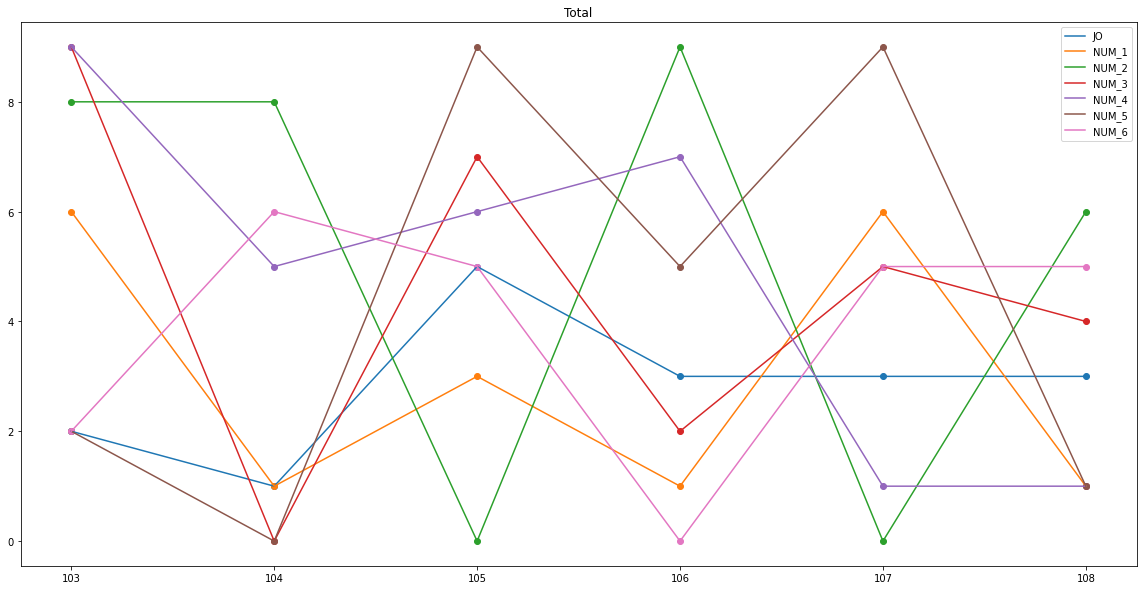

In [33]:
k = 6
plt.figure(figsize=(20,10))
plt.title('Total')

plt.scatter(ID[:k],df['JO'][:k])
plt.plot(ID[:k], df['JO'][:k], label='JO')

plt.scatter(ID[:k],df['NUM_1'][:k])
plt.plot(ID[:k], df['NUM_1'][:k], label='NUM_1')

plt.scatter(ID[:k],df['NUM_2'][:k])
plt.plot(ID[:k], df['NUM_2'][:k],label='NUM_2')

plt.scatter(ID[:k],df['NUM_3'][:k])
plt.plot(ID[:k], df['NUM_3'][:k],label='NUM_3')

plt.scatter(ID[:k],df['NUM_4'][:k])
plt.plot(ID[:k], df['NUM_4'][:k],label='NUM_4')

plt.scatter(ID[:k],df['NUM_5'][:k])
plt.plot(ID[:k], df['NUM_5'][:k],label='NUM_5')

plt.scatter(ID[:k],df['NUM_6'][:k])
plt.plot(ID[:k], df['NUM_6'][:k],label='NUM_6')

# plt.axhline(1, color='r')
# plt.axhline(3, color='k')
# plt.axhline(5, color='b')
# plt.axhline(7, color='y')

plt.legend()

plt.show()

In [43]:
# 범위 회당 (i) 가장 많이나온 두개 수
for i in range(1,20):
    print('i : ', i)
    print(df['JO'][:i].value_counts().sort_values(ascending=False)[:2].index)     
    print(df['NUM_1'][:i].value_counts().sort_values(ascending=False)[:2].index)  
    print(df['NUM_2'][:i].value_counts().sort_values(ascending=False)[:2].index)  
    print(df['NUM_3'][:i].value_counts().sort_values(ascending=False)[:2].index)  
    print(df['NUM_4'][:i].value_counts().sort_values(ascending=False)[:2].index)  
    print(df['NUM_5'][:i].value_counts().sort_values(ascending=False)[:2].index)  
    print(df['NUM_6'][:i].value_counts().sort_values(ascending=False)[:2].index)  
    print('----------')

    # 4 : 4

i :  1
Int64Index([3], dtype='int64')
Int64Index([1], dtype='int64')
Int64Index([6], dtype='int64')
Int64Index([4], dtype='int64')
Int64Index([1], dtype='int64')
Int64Index([1], dtype='int64')
Int64Index([5], dtype='int64')
----------
i :  2
Int64Index([3], dtype='int64')
Int64Index([1, 6], dtype='int64')
Int64Index([6, 0], dtype='int64')
Int64Index([4, 5], dtype='int64')
Int64Index([1], dtype='int64')
Int64Index([1, 9], dtype='int64')
Int64Index([5], dtype='int64')
----------
i :  3
Int64Index([3], dtype='int64')
Int64Index([1, 6], dtype='int64')
Int64Index([6, 0], dtype='int64')
Int64Index([4, 5], dtype='int64')
Int64Index([1, 7], dtype='int64')
Int64Index([1, 9], dtype='int64')
Int64Index([5, 0], dtype='int64')
----------
i :  4
Int64Index([3, 5], dtype='int64')
Int64Index([1, 6], dtype='int64')
Int64Index([0, 6], dtype='int64')
Int64Index([4, 5], dtype='int64')
Int64Index([1, 7], dtype='int64')
Int64Index([9, 1], dtype='int64')
Int64Index([5, 0], dtype='int64')
----------
i :  5
In

In [35]:
# 최대값이 하나인 경우의 추첨번호 
index_a = []
for a in range(2,100):

    jo = df['JO'][:a].value_counts().sort_values(ascending=False)[:5]
    n1 = df['NUM_1'][:a].value_counts().sort_values(ascending=False)[:5]
    n2 = df['NUM_2'][:a].value_counts().sort_values(ascending=False)[:5]
    n3 = df['NUM_3'][:a].value_counts().sort_values(ascending=False)[:5]
    n4 = df['NUM_4'][:a].value_counts().sort_values(ascending=False)[:5]
    n5 = df['NUM_5'][:a].value_counts().sort_values(ascending=False)[:5]
    n6 = df['NUM_6'][:a].value_counts().sort_values(ascending=False)[:5]

    if list(jo.values).count(max(jo)) >= 2:
        continue
    if list(n1.values).count(max(n1)) >= 2:
        continue
    if list(n2.values).count(max(n2)) >= 2:
        continue
    if list(n3.values).count(max(n3)) >= 2:
        continue
    if list(n4.values).count(max(n4)) >= 2:
        continue
    if list(n5.values).count(max(n5)) >= 2:
        continue
    if list(n6.values).count(max(n6)) < 2:
        print('a : ', a)
        index_a.append(a)
        # print(jo)
        # print(n1)
        # print(n2)
        # print(n3)
        # print(n4)
        # print(n5)
        # print(n6)
        
        # break
index_a

a :  27
a :  28
a :  29
a :  43
a :  44
a :  53
a :  54
a :  94
a :  97
a :  98
a :  99


[27, 28, 29, 43, 44, 53, 54, 94, 97, 98, 99]

In [36]:
# 추첨값이 하나인 경우의 추첨번호
a = index_a
for i in a:
    print('i : ', i)
    print(df['JO'][:i].value_counts().sort_values(ascending=False)[:4].index)     
    print(df['NUM_1'][:i].value_counts().sort_values(ascending=False)[:4].index)  
    print(df['NUM_2'][:i].value_counts().sort_values(ascending=False)[:4].index)  
    print(df['NUM_3'][:i].value_counts().sort_values(ascending=False)[:4].index)  
    print(df['NUM_4'][:i].value_counts().sort_values(ascending=False)[:4].index)  
    print(df['NUM_5'][:i].value_counts().sort_values(ascending=False)[:4].index) 
    print(df['NUM_6'][:i].value_counts().sort_values(ascending=False)[:4].index) 
    print('----------')

i :  27
Int64Index([4, 3, 5, 1], dtype='int64')
Int64Index([1, 3, 7, 5], dtype='int64')
Int64Index([8, 0, 3, 6], dtype='int64')
Int64Index([0, 7, 5, 9], dtype='int64')
Int64Index([1, 3, 4, 6], dtype='int64')
Int64Index([9, 2, 4, 5], dtype='int64')
Int64Index([1, 5, 9, 8], dtype='int64')
----------
i :  28
Int64Index([4, 3, 5, 1], dtype='int64')
Int64Index([1, 3, 7, 5], dtype='int64')
Int64Index([8, 3, 0, 6], dtype='int64')
Int64Index([0, 5, 7, 9], dtype='int64')
Int64Index([1, 3, 4, 6], dtype='int64')
Int64Index([9, 5, 2, 4], dtype='int64')
Int64Index([1, 5, 9, 8], dtype='int64')
----------
i :  29
Int64Index([4, 3, 5, 1], dtype='int64')
Int64Index([1, 3, 7, 5], dtype='int64')
Int64Index([8, 3, 0, 6], dtype='int64')
Int64Index([0, 5, 7, 9], dtype='int64')
Int64Index([1, 5, 3, 4], dtype='int64')
Int64Index([9, 5, 2, 4], dtype='int64')
Int64Index([1, 5, 9, 8], dtype='int64')
----------
i :  43
Int64Index([4, 3, 1, 5], dtype='int64')
Int64Index([1, 7, 5, 6], dtype='int64')
Int64Index([8, 

In [49]:
# 범위 회당 (i) 가장 많이나온 두개 수
for i in range(len(df),len(df)+1):
    print('i : ', i)
    print(list(df['JO'][:i].value_counts().sort_values(ascending=False)[:10].index)[2],'조',end=' ')     # 3
    print(list(df['NUM_1'][:i].value_counts().sort_values(ascending=False)[:10].index)[1],end=' ')  # 2
    print(list(df['NUM_2'][:i].value_counts().sort_values(ascending=False)[:10].index)[8],end=' ')  # 9
    print(list(df['NUM_3'][:i].value_counts().sort_values(ascending=False)[:10].index)[8],end=' ')  # 9
    print(list(df['NUM_4'][:i].value_counts().sort_values(ascending=False)[:10].index)[4],end=' ')  # 5
    print(list(df['NUM_5'][:i].value_counts().sort_values(ascending=False)[:10].index)[5],end=' ')  # 6
    print(list(df['NUM_6'][:i].value_counts().sort_values(ascending=False)[:10].index)[4])  # 5
    print('----------')

    # 4 : 4

i :  109
3 조 5 4 1 3 8 9
----------


# 109회 번호 예측
- (1)번 방법은 : `4조 7 8 0 3 9 1`
- (2)번 방법은 : `4조 7 9 6 2 5 0`

- 실제 응모 : 
1조796251 / 4조796251 / 1조796250 / 1조780391

# 109회 번호 결과
- `3조 1 6 4 1 1 5`

# 110회 번호 예측
- `3조 5 4 1 3 8 9` (전체 토탈에서 이전회차 당첨 숫자 index의 값 반환)

# 110회 번호 결과
